- Create grid x of 2000 x-values between 0 and box of length L=500 atomic units
- Create an array Psi of Gaussian wavepacket values using custom function Gauss_Packet(x, x0, sig, k0) with x0 = 200, k0 = 0.4, sig = 15 (all atomic units)
- Create an array n of PIB quantum numbers between 1 and N using np.linspace
- Determine the complex amplitude for all N PIB energy eigenfunctions to create a superposition that approximates the Gaussian Wavepacket using custom function FourierAnalysis(x, Psi, n, L) 
- Create an array of superposition values psi_exp using complex amplitudes from step 4
- Plot Psi and psi_exp to visualize goodness of the fit using plt.plot(x, y, style, …) and plt.show()

\begin{equation}
\Psi(x) = \frac{1}{\sigma \sqrt(2\pi)} exp(\frac{-1}{2}\left(\frac{x-x_0}{\sigma}\right)^2) exp(i k_0 x)
\end{equation}

1j
-1j
(1+0j)
(-1+0j)
(-0-1j)
(1+0j)


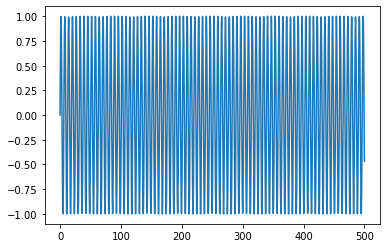

In [14]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
### This is the square root of negative 1
ci = 0+1j
### This is how you take the complex conjugate!
ci_star = np.conj(ci)
print(ci)
print(ci_star)

### multiply them and make sure it's real!
print(ci * ci_star)
print(ci**2)
print(ci**3)
print(ci**4)

x = np.linspace(0,500,2000)
fx = np.sin(x)

plt.plot(x, fx)
plt.show()




In [15]:
# This is my custom function to take the sin of a numpy array of x values and return it as a new numpy array!
def my_sin(x_array, A):
    sin_of_x = A*np.sin(x_array)
    return sin_of_x

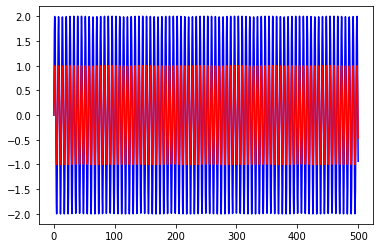

In [16]:
my_fx = my_sin(x, 2.0)


plt.plot(x, my_fx, 'blue')
plt.plot(x, fx, 'red')
plt.show()

In [17]:
# Custom function Gauss_Packet which takes an array of x values, an x0 value, a sig value, and a k0 value
# and returns the corresponding Gaussian wavepacket!
def Gauss_Packet(x, x0, sig, k0):
    ### need sqrt of -1!
    ci = 0+1j
    ### T1 will be the prefactor that is 1/(sigma * sqrt(2 * pi))
    T1 = 1/(sig * np.sqrt(2 * np.pi))
    ### T2 will be the Gaussian function, exp(-0.5 * ((x-x0)/sigma)^2)
    T2 = np.exp(-0.5 * ((x-x0)/sig)**2)
    ### T3 will be the complex exponential (aka the plane wave!)
    T3 = np.exp(ci * k0 * x)
    ### return the product of T1 * T2 * T3
    return T1 * T2 * T3

# custom function PIB that takes the length-of-box L, the quantum number n, and array of x values x
# and returns the corresponding PIB energy eigenfunction
def PIB(L, n, x):
    return np.sqrt(2/L) * np.sin(n * np.pi * x/L)

def integrate(x, f_of_x):
    ### get the width of each rectangle!
    w = x[1]-x[0]
    integral = 0
    for i in range(1,len(x)):
        h = f_of_x[i]
        A = w * h
        integral = integral + A
        #integral += A does the same thing
        
    return integral
        
def PIB_En(n,L):
    return n**2 * np.pi**2/(2*L**2)
    

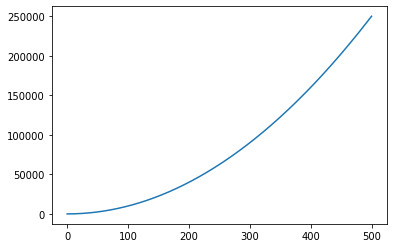

Python Result 41697937.5130286
Wolfram Alpha Result 41666666.666666664


In [18]:
### make a list of x^2 values, called x_squared, using our grid called x!
x_squared = x**2

plt.plot(x, x_squared)
plt.show()

area = integrate(x, x_squared)
print("Python Result",area)
print("Wolfram Alpha Result",125000000/3.)

c_1 is  (5.836243078843953e-11-1.074784986040169e-09j)


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


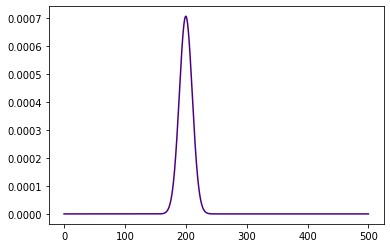

In [19]:
x0 = 200
sig = 15
k0 = 0.4
L = 500
n = 1

psi_1 = PIB(L, n, x)
PSI = Gauss_Packet(x, x0, sig, k0)
PSI_r = np.real(PSI)
PSI_i = np.imag(PSI)

### This integrand is psi_1^* * PSI
integrand = np.conj(psi_1) * PSI
c_1 = integrate(x, integrand)

print("c_1 is ",c_1)

P_of_x = np.conj(PSI) * PSI

#plt.plot(x, PSI_r, 'red')
plt.plot(x, P_of_x, 'indigo')
#plt.plot(x, psi_3, 'blue')
plt.show()

In [24]:
### We are going to compute the superposition of PIB eigenfunctions
### that approximate the gaussian wavepacket!  We will store the superposition
### in a numpy array called psi_e, which will be initialized as an array of zeros!
psi_e = np.zeros_like(PSI)
### Loop over the first N PIB states, compute their coefficients, and add them to psi_e
numerator = 0.
denominator = 0.
for i in range(1,100):
    psi = PIB(L,i,x)
    En = PIB_En(i,L)
    integrand = np.conj(psi)*PSI
    c = integrate(x, integrand)
    numerator = numerator + np.conj(c)*c*En
    denominator = denominator + np.conj(c)*c
    psi_e = psi_e + c * psi

print("Energy expectation value is",numerator/denominator)


Energy expectation value is (0.08111100578433778+0j)


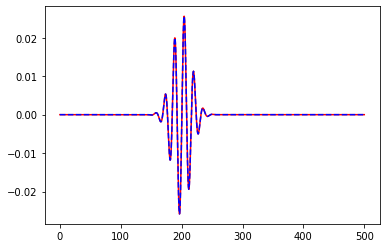

In [23]:
### Plot PSI and psi_e, using blue dashes so I can see if
### the plots are the same
plt.plot(x, PSI, 'red')
plt.plot(x, psi_e, 'b--')
plt.show()

### Question 1 (Goeppert-Mayer):  If you send this particle through a Stern-Gerlach box that measures energy, what is the probability that you will measure $E_{70}$?

### Question 2 (Noether):  What is the energy expectation value of this Gaussian-Wavefunction?  There is an "easy" way to do this calculation now that you have $\Psi(x)$ expanded in terms of the energy eigenfunctions.

### Question 3 (Curie):  What is the probability of finding the particle represented by the Gaussian Wavepacket between x = 200 and x = 201 atomic units?